# Extracción de características y aplicación de técnicas de reducción 
# de dimensionalidad para el análisis multivariado de señales

procedemos a importar las librerias que se pretenden utilizar para procesar las imagenes

In [1]:
import librosa as lr
import numpy as np
from IPython.display import Audio
import soundfile as sf
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline
import pandas as pd
import scipy as sp
from scipy.stats import skew, kurtosis
from scipy.fft import fft
import seaborn as sbn
from sklearn.decomposition import PCA
import cv2
import os
from skimage.feature import hog, multiblock_lbp

procedemor a realizar la extraccion de caracteristicas del dataseet del cual estamos basandonos en este proyecto, de la siguiente manera

In [2]:
"""
# Carpeta base que contiene las subcarpetas (A-U)
directorio_base = './Base de datos de señas/fondo_blanco'

# Función para extraer estadísticas básicas de la imagen
def extraer_estadisticas(img):
    stats = {
        'media': np.mean(img),
        'varianza': np.var(img),
        'asimetria': skew(img.flatten()),
        'curtosis': kurtosis(img.flatten()),
        'maximo': np.max(img),
        'minimo': np.min(img)  # Agregar valor mínimo de la imagen
    }
    return stats

# Función para extraer estadísticas de Fourier
def extraer_estadisticas_fourier(img):
    # Transformada de Fourier
    f_transform = np.fft.fft2(img)
    f_transform = np.fft.fftshift(f_transform)
    magnitud_espectro = np.abs(f_transform)
    
    # Datos estadísticos de Fourier
    estadisticas_fourier = {
        'medias_fourier': np.mean(magnitud_espectro),
        'varianzas_fourier': np.var(magnitud_espectro),
        'asimetria_fourier': skew(magnitud_espectro.flatten()),
        'curtosis_fourier': kurtosis(magnitud_espectro.flatten()),
        'maximos_fourier': np.max(magnitud_espectro),  # Valor máximo en Fourier
        'minimos_fourier': np.min(magnitud_espectro)   # Valor mínimo en Fourier
    }
    return estadisticas_fourier

# Lista para almacenar todas las características de las imágenes
lista_todas_caracteristicas = []

# Recorrer los 19 directorios (A - U)
for carpeta in range(ord('A'), ord('V')):  # De 'A' a 'U'
    nombre_carpeta = chr(carpeta)
    ruta_carpeta = os.path.join(directorio_base, nombre_carpeta)
    
    # Verificar si el directorio existe
    if not os.path.exists(ruta_carpeta):
        print(f"El directorio {nombre_carpeta} no existe.")
        continue

    # Procesar todas las imágenes .JPG en el directorio actual
    for archivo in os.listdir(ruta_carpeta):
        if archivo.upper().endswith('.JPG'):  # Verificar que el archivo sea .JPG (insensible a mayúsculas/minúsculas)
            ruta_imagen = os.path.join(ruta_carpeta, archivo)
            
            # Leer la imagen en escala de grises
            imagen = cv2.imread(ruta_imagen, cv2.IMREAD_GRAYSCALE)

            # Verificar si la imagen se ha cargado correctamente
            if imagen is None:
                print(f"No se puede abrir la imagen en la ruta: {ruta_imagen}")
                continue  # Saltar a la siguiente imagen si no se puede cargar

            # Extraer las características de la imagen
            stats = extraer_estadisticas(imagen)
            estadisticas_fourier = extraer_estadisticas_fourier(imagen)

            # Todas las características en un solo diccionario
            all_features = {**stats, **estadisticas_fourier}
            #all_features['nombre_imagen'] = archivo  # Guardar también el nombre de la imagen
            #all_features['directorio'] = nombre_carpeta  # Guardar también el directorio

            # Agregar las características a la lista
            lista_todas_caracteristicas.append(all_features)

# Crear un DataFrame con todas las características
df = pd.DataFrame(lista_todas_caracteristicas)

# Mostrar el DataFrame resultante
print(df)

# Guardar el DataFrame en un archivo CSV
df.to_csv('caracteristicas_imagenes.csv', index=False)
"""

'\n# Carpeta base que contiene las subcarpetas (A-U)\ndirectorio_base = \'./Base de datos de señas/fondo_blanco\'\n\n# Función para extraer estadísticas básicas de la imagen\ndef extraer_estadisticas(img):\n    stats = {\n        \'media\': np.mean(img),\n        \'varianza\': np.var(img),\n        \'asimetria\': skew(img.flatten()),\n        \'curtosis\': kurtosis(img.flatten()),\n        \'maximo\': np.max(img),\n        \'minimo\': np.min(img)  # Agregar valor mínimo de la imagen\n    }\n    return stats\n\n# Función para extraer estadísticas de Fourier\ndef extraer_estadisticas_fourier(img):\n    # Transformada de Fourier\n    f_transform = np.fft.fft2(img)\n    f_transform = np.fft.fftshift(f_transform)\n    magnitud_espectro = np.abs(f_transform)\n    \n    # Datos estadísticos de Fourier\n    estadisticas_fourier = {\n        \'medias_fourier\': np.mean(magnitud_espectro),\n        \'varianzas_fourier\': np.var(magnitud_espectro),\n        \'asimetria_fourier\': skew(magnitud_es

In [3]:
"""
import cv2
import os
from skimage import color as skic, filters as skif

# Directorios de origen y destino
src_dir = os.path.expanduser('~/Escritorio/Udea 2024 II/Proyecto Señales III/Base de datos de señas/fondo_blanco')
dst_dir = './images_redimen/'

# Crear el directorio de destino si no existe
if not os.path.exists(dst_dir):
    os.makedirs(dst_dir)

# Recorrer directorios A-U
for carpeta in 'ABCDEFGIKLMNOPQRSTU':
    carpeta_origen = os.path.join(src_dir, carpeta)
    carpeta_destino = os.path.join(dst_dir, carpeta)

    # Crear carpeta de destino si no existe
    if not os.path.exists(carpeta_destino):
        os.makedirs(carpeta_destino)

    # Listar imágenes en el directorio actual
    imgs = [f for f in os.listdir(carpeta_origen) if f.endswith(('.JPG', '.png', '.jpeg'))]

    # Iterar sobre las imágenes
    for i, img in enumerate(imgs):
        img_path = os.path.join(carpeta_origen, img)
        img = cv2.imread(img_path)
        
        if img is None:
            print(f"Error al leer la imagen: {img_path}")
            continue

        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        # Redimensionar la imagen
        h, w, _ = img.shape
        new_size = (int(w * 0.1), int(h * 0.1))
        imagen_redimensionada = cv2.resize(img, new_size, interpolation=cv2.INTER_AREA)

        # Guardar la imagen redimensionada
        out_path = os.path.join(carpeta_destino, f'{i+1:02}.jpg')
        cv2.imwrite(out_path, cv2.cvtColor(imagen_redimensionada, cv2.COLOR_RGB2BGR))

        # Convertir a escala de grises
        imagen_gris = skic.rgb2gray(imagen_redimensionada)

        # Aplicar filtro Sobel
        imagen_sobel = skif.sobel(imagen_gris)

        # Guardar la imagen de escala de grises y Sobel
        ruta_guardar_sobel = os.path.join(carpeta_destino, f'{i+1:02}_gray_&_sobel.jpg')
        cv2.imwrite(ruta_guardar_sobel, (imagen_sobel * 255).astype('uint8'))  # Convertir a rango adecuado y guardar

print("Procesamiento completado.")
"""

'\nimport cv2\nimport os\nfrom skimage import color as skic, filters as skif\n\n# Directorios de origen y destino\nsrc_dir = os.path.expanduser(\'~/Escritorio/Udea 2024 II/Proyecto Señales III/Base de datos de señas/fondo_blanco\')\ndst_dir = \'./images_redimen/\'\n\n# Crear el directorio de destino si no existe\nif not os.path.exists(dst_dir):\n    os.makedirs(dst_dir)\n\n# Recorrer directorios A-U\nfor carpeta in \'ABCDEFGIKLMNOPQRSTU\':\n    carpeta_origen = os.path.join(src_dir, carpeta)\n    carpeta_destino = os.path.join(dst_dir, carpeta)\n\n    # Crear carpeta de destino si no existe\n    if not os.path.exists(carpeta_destino):\n        os.makedirs(carpeta_destino)\n\n    # Listar imágenes en el directorio actual\n    imgs = [f for f in os.listdir(carpeta_origen) if f.endswith((\'.JPG\', \'.png\', \'.jpeg\'))]\n\n    # Iterar sobre las imágenes\n    for i, img in enumerate(imgs):\n        img_path = os.path.join(carpeta_origen, img)\n        img = cv2.imread(img_path)\n        \

Saquen valores estadisticos, medias varianzas, desviaciones estandar y HOG BLP

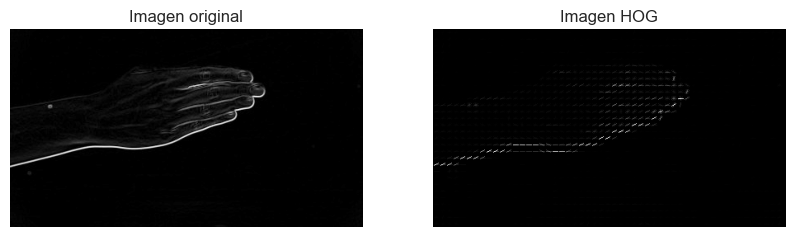

In [4]:
from skimage.feature import hog
from skimage import io, color
import matplotlib.pyplot as plt

# Cargar la imagen
imagen_gris = io.imread('C:/Users/sebas/Documents/Miniproyectos/Proyecto-Senales-III/Miniproyecto#2/prueba.jpg')


# Calcular HOG
caracteristicas_hog, imagen_hog = hog(imagen_gris, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True, block_norm='L2-Hys')

# Visualizar la imagen original y la imagen HOG
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(imagen_gris, cmap=plt.cm.gray)
ax1.set_title('Imagen original')

ax2.axis('off')
ax2.imshow(imagen_hog, cmap=plt.cm.gray)
ax2.set_title('Imagen HOG')

plt.show()


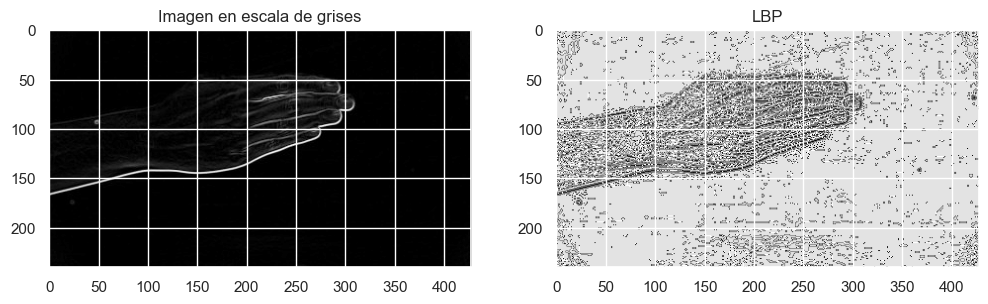

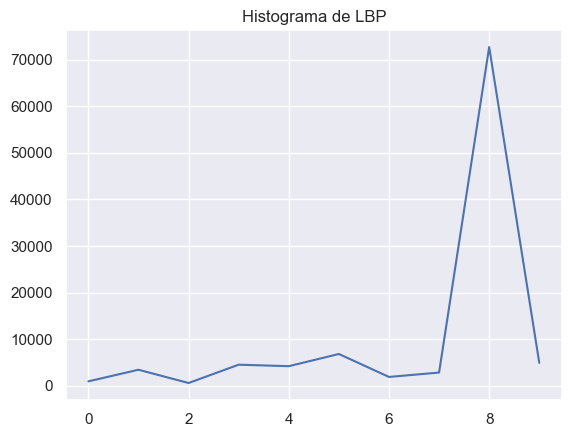

In [5]:
import numpy as np
from skimage import io, color
from skimage.feature import local_binary_pattern
import matplotlib.pyplot as plt

# Cargar la imagen y convertir a escala de grises si es necesario
imagen_gris = io.imread('C:/Users/sebas/Documents/Miniproyectos/Proyecto-Senales-III/Miniproyecto#2/prueba.jpg')

# Parámetros del LBP
radius = 1  # Radio de la vecindad
n_points = 8 * radius  # Número de puntos en la vecindad

# Aplicar el LBP
lbp = local_binary_pattern(imagen_gris, n_points, radius, method='uniform')

# Mostrar la imagen original y el LBP
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(imagen_gris, cmap='gray')
plt.title('Imagen en escala de grises')

plt.subplot(1, 2, 2)
plt.imshow(lbp, cmap='gray')
plt.title('LBP')

plt.show()

# Histograma de las características LBP
(hist, _) = np.histogram(lbp.ravel(), bins=np.arange(0, n_points + 3), range=(0, n_points + 2))

# Mostrar el histograma
plt.figure()
plt.plot(hist)
plt.title('Histograma de LBP')
plt.show()


In [9]:
import cv2
import os
import numpy as np
import pandas as pd
from skimage import feature
from skimage.feature import hog
from skimage.color import rgb2gray
from scipy.stats import skew, kurtosis

# Carpeta base que contiene las subcarpetas (A-U)
directorio_base = 'images_redimen'

# Función para extraer estadísticas básicas de la imagen
def extraer_estadisticas(img):
    stats = {
        'media': np.mean(img),
        'varianza': np.var(img),
        'asimetria': skew(img.flatten()),
        'curtosis': kurtosis(img.flatten()),
        'maximo': np.max(img),
        'minimo': np.min(img)  # Agregar valor mínimo de la imagen
    }
    return stats

# Función para extraer estadísticas de Fourier
def extraer_estadisticas_fourier(img):
    f_transform = np.fft.fft2(img)
    f_transform = np.fft.fftshift(f_transform)
    magnitud_espectro = np.abs(f_transform)
    
    estadisticas_fourier = {
        'medias_fourier': np.mean(magnitud_espectro),
        'varianzas_fourier': np.var(magnitud_espectro),
        'asimetria_fourier': skew(magnitud_espectro.flatten()),
        'curtosis_fourier': kurtosis(magnitud_espectro.flatten()),
        'maximos_fourier': np.max(magnitud_espectro),
        'minimos_fourier': np.min(magnitud_espectro)
    }
    return estadisticas_fourier

# Función para extraer HOG
def extraer_hog(img):
    hog_features, _ = hog(
        img, 
        pixels_per_cell=(128, 128),  # Aumenta el tamaño de la celda para reducir el número de celdas
        cells_per_block=(1, 1),    # Disminuye el tamaño del bloque para reducir la superposición
        orientations=8,            # Menos orientaciones para disminuir el número de bins en los histogramas
        visualize=True, 
        channel_axis=None
    )
    return hog_features

# Función para extraer LBP
def extraer_lbp(img):
    lbp = feature.local_binary_pattern(img, P=8, R=1, method='uniform')
    (hist, _) = np.histogram(lbp, bins=np.arange(0, 11), range=(0, 10))
    hist = hist.astype("float")
    hist /= hist.sum()
    return hist

# Lista para almacenar todas las características de las imágenes
lista_todas_caracteristicas = []

# Recorrer los 19 directorios (A - U)
for carpeta in range(ord('A'), ord('V')):  # De 'A' a 'U'
    nombre_carpeta = chr(carpeta)
    ruta_carpeta = os.path.join(directorio_base, nombre_carpeta)
    
    if not os.path.exists(ruta_carpeta):
        print(f"El directorio {nombre_carpeta} no existe.")
        continue

    for archivo in os.listdir(ruta_carpeta):
        if '_gray_&_sobel' in archivo and archivo.lower().endswith('.jpg'):
            ruta_imagen = os.path.join(ruta_carpeta, archivo)
            imagen = cv2.imread(ruta_imagen, cv2.IMREAD_GRAYSCALE)
    
            if imagen is None:
                print(f"No se puede abrir la imagen en la ruta: {ruta_imagen}")
                continue
    
            # Extraer las características de la imagen
            stats = extraer_estadisticas(imagen)
            estadisticas_fourier = extraer_estadisticas_fourier(imagen)
            hog_features = extraer_hog(imagen)
            lbp_features = extraer_lbp(imagen)
    
            # Separar las características del HOG en columnas individuales
            hog_dict = {f'hog_{i}': hog_features[i] for i in range(len(hog_features))}
    
            # Separar las características del LBP en columnas individuales
            lbp_dict = {f'lbp_{i}': lbp_features[i] for i in range(len(lbp_features))}
    
            # Unir todas las características en un solo diccionario
            all_features = {**stats, **estadisticas_fourier, **hog_dict, **lbp_dict}
    
            # Agregar las características a la lista
            lista_todas_caracteristicas.append(all_features)

# Crear un DataFrame con todas las características
df = pd.DataFrame(lista_todas_caracteristicas)

# Mostrar el DataFrame resultante
print(df)

# Guardar el DataFrame en un archivo CSV
df.to_csv('caracteristicas_imagenes_final.csv', index=False)


El directorio J no existe.
         media   varianza  asimetria    curtosis  maximo  minimo  \
0     1.022790  24.772446   9.381214  109.316525      83       0   
1     1.505987  16.726580   8.317142   89.911756      76       0   
2     1.598257  16.157908   7.912610   81.566592      75       0   
3     1.243419  31.890124   8.720161   91.376599      85       0   
4     1.691550  40.527016   7.803823   74.689446      90       0   
...        ...        ...        ...         ...     ...     ...   
1993  1.578018  18.841304   7.393260   68.289889      87       0   
1994  1.613912  20.729139   7.791692   78.899673     112       0   
1995  1.456815  30.925199   7.475739   70.686647      98       0   
1996  1.382136  22.946836   6.981292   64.000101     108       0   
1997  1.340021  23.541171   7.252141   66.570742      76       0   

      medias_fourier  varianzas_fourier  asimetria_fourier  curtosis_fourier  \
0         669.366319       2.204030e+06          19.013443        843.364456